<a href="https://colab.research.google.com/github/Omarhersan/Project_imagenet/blob/Omar/No_sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200'
#image_path = './tiny-imagenet-200'

In [3]:
def read_file(file_path):
    """
    Reads a .txt file where each row is identified by the fourth separator '\t'.
    
    Parameters:
    file_path (str): The path to the .txt file.
    
    Returns:
    list: A list of lists where each inner list represents a row of the .txt file.
    """
    rows = []
    with open(file_path, 'r') as file:
        for line in file:
            # Remove the '\n' character from the end of the line
            line = line.rstrip('\n')
            # Split each line by '\t' delimiter
            row = line.split('\t')
            #row = row[1:]
            rows.append(row)
    return rows

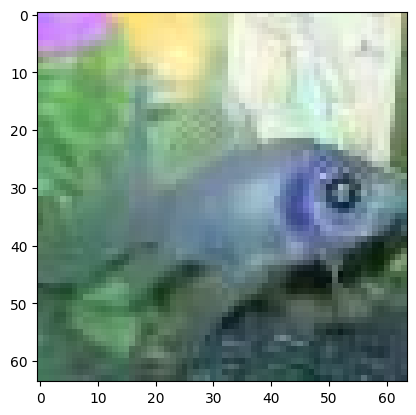

In [4]:
una_imagen = cv2.imread(os.path.join(image_path, 'train/n01443537/images/n01443537_0.JPEG'))
plt.imshow(una_imagen)

In [5]:
una_bbox = read_file(os.path.join(image_path, 'train/n01443537/n01443537_boxes.txt'))
una_bbox[0]

['n01443537_0.JPEG', '0', '10', '63', '58']

In [6]:
def draw_bbox_on_image(image, bbox):
    """
    Draws a bounding box on an image using the provided coordinates.
    
    Parameters:
    image (numpy.ndarray): The image to draw the bounding box on.
    bbox (list): A list of four integers representing the bounding box coordinates in the format [x_min, y_min, x_max, y_max].
    
    Returns:
    numpy.ndarray: The image with the bounding box drawn on it.
    """
    # Convert bbox coordinates to integers
    bbox = [int(coord) for coord in bbox]
    # Draw the bounding box on the image
    image_with_bbox = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
    return image_with_bbox

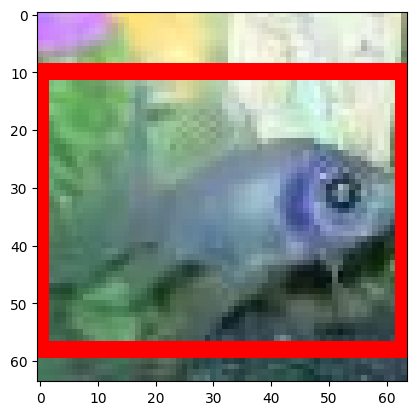

In [7]:
plt.imshow(draw_bbox_on_image(una_imagen, una_bbox[0][1:]))

# Using Class for Data Generation

In [9]:
from utils import DataPreparator

In [ ]:
data = DataPreparator('/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200/train/', 
                      '/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200/val/',
                      '/content/drive/MyDrive/Deep learning/Proyecto_1/tiny-imagenet-200/train/')
train_data, val_data, test_data = data.returnData()

In [ ]:
train_data

In [ ]:
val_data

In [ ]:
test_data

In [ ]:
#TODO: Queda pendiente hacer lo de las metricas y el modelo, ya esta lista la generación de los tensores para los datasets

In [ ]:
from keras.applications import VGG16, ResNet50, VGG19, NASNetLarge, ConvNeXtBase
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

In [ ]:
# Implementación del primer modelo


vgg16 = VGG16(include_top= False, input_tensor= Input(shape = (50,50, 3)))
vgg16.trainable = True
ouput_vgg16 = vgg16.output

In [ ]:
# Perceptrón con doble salida

x = Flatten()(ouput_vgg16)
x = Dense(3200, activation = 'relu')(x)
x = Dense(2400, activation = 'relu')(x)
x = Dense(1000, activation = 'relu')(x)
output_tensor_classification = Dense(200)(x)
output_tensor_regression = Dense(4)(x)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
model = Model(inputs = vgg16, outputs = [output_tensor_classification, output_tensor_regression])

In [ ]:
model.compile(optimizer = 'adam', loss = ['mae'], metrics = ['accuracy'], learning_rate = 0.1)

In [ ]:
model.fit(train_data, validation_data = val_data, epochs = 100)